## Week 5 - Computational Social Science 02467 

In [14]:
# Exercise 1 

import numpy as np 
import matplotlib.pyplot as plt     
import pandas as pd 

from scipy.stats import expon
from netwulf import visualize 
import itertools 



In [15]:
# Generate data points

N = 10000 
mean = 0 
stdev = 4 

X = np.random.normal(mean, stdev, N)
x_values = np.linspace(-3*stdev, 3*stdev, N)

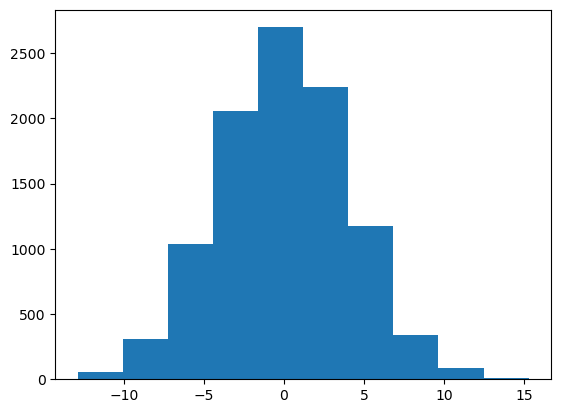

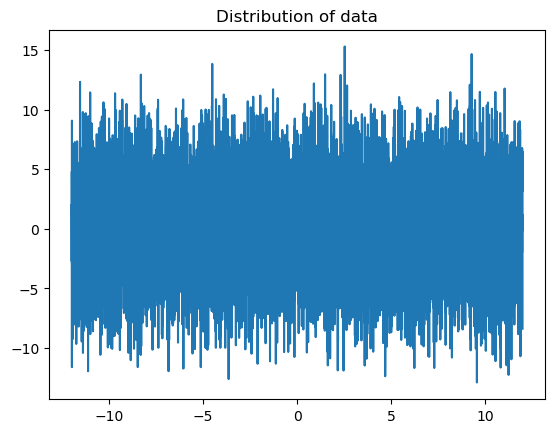

In [16]:
# Plot distribution
plt.hist(X)
plt.show() 

plt.plot(x_values, X)
plt.title("Distribution of data")
plt.show()

In [17]:
# Compute cumulative average

def get_gumulative_av(data): 
    cumulative_av = np.array([(sum(data[:i+1])/(i+1)) for i in range(len(data))])
    return cumulative_av

def get_gumulative_error(data): 
    n = len(data)
    
    stdev_array = np.zeros_like(data)
    for i in range(len(data)):
        stdev_array[i] = np.std(data[:i+1])

    cumulative_err = stdev_array/np.sqrt(n) 
    return cumulative_err 

cumulative_av = get_gumulative_av(X)
cumulative_err = get_gumulative_error(X)

print(cumulative_av)
print(cumulative_err)


[ 1.98725413  0.17831289 -0.22957431 ... -0.00243334 -0.00269784
 -0.00353556]
[0.         0.01808941 0.01585641 ... 0.04020534 0.0402042  0.04021091]


In [18]:
# Compute mean and median 

mean_computed = np.sum(X) / len(X)
median = np.median(X)

print(mean)
print(median)

0
0.013590578158985234


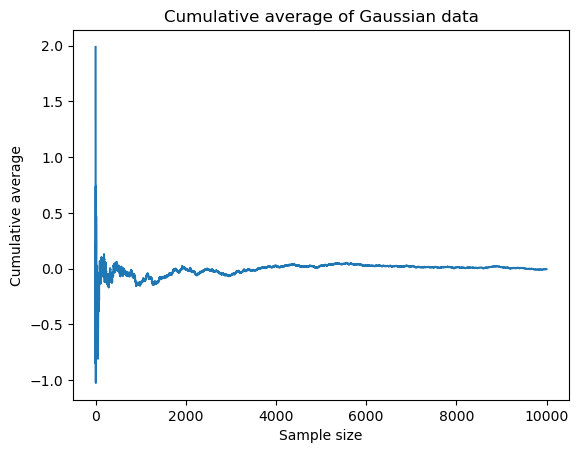

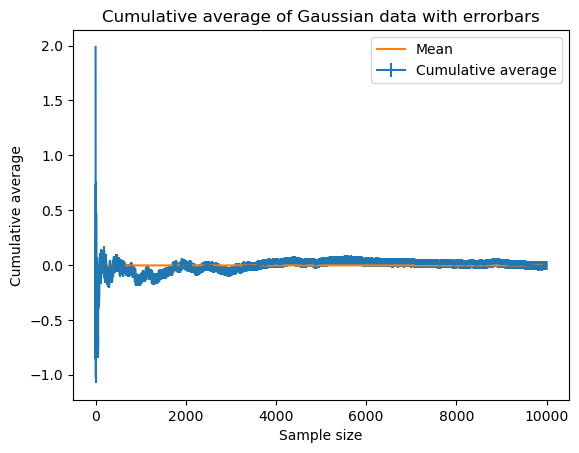

In [19]:
# Plot cumulative average 
size_samples = range(0, len(cumulative_av))

plt.plot(size_samples, cumulative_av)
plt.ylabel("Cumulative average")
plt.xlabel("Sample size")
plt.title("Cumulative average of Gaussian data")
plt.show()

# Add errorbars 

plt.errorbar(size_samples, cumulative_av, yerr=cumulative_err, label="Cumulative average")
plt.plot(size_samples, [mean_computed]*len(size_samples), label="Mean")
plt.ylabel("Cumulative average")
plt.xlabel("Sample size")
plt.title("Cumulative average of Gaussian data with errorbars")
plt.legend()
plt.show()


In [20]:
# Compute the cumulative median 

def get_cumulative_med(data): 
    cumulative_med = np.array([np.median(data[:i+1]) for i in range(len(data))])
    return cumulative_med 

cumulative_med = get_cumulative_med(X)

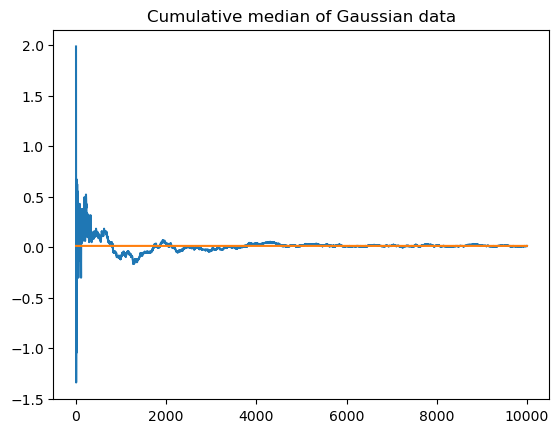

In [21]:
# Plot cumulative median 

plt.plot(size_samples, cumulative_med)
plt.plot(size_samples, [median]*len(size_samples))
plt.title("Cumulative median of Gaussian data")
plt.show()

In [22]:
# Sample data points from pareto distribution 
alpha = 0.5 
x_m = 1 

data_pareto = (np.random.pareto(alpha, N)) * x_m
x_values_pareto = range(0, len(data_pareto))

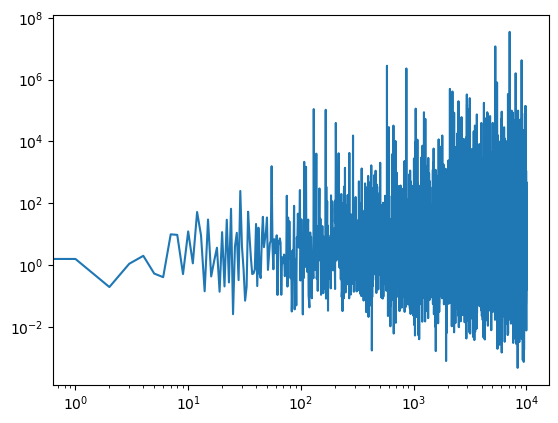

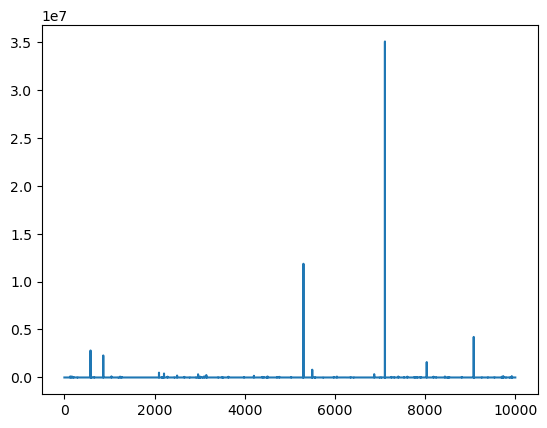

In [23]:
# Plot distribution 

plt.loglog(x_values_pareto, data_pareto)
plt.show()

plt.plot(x_values_pareto, data_pareto)
plt.show()

In [24]:
# Compute cumulative average, cumulative error, cumulative median, mean and median

cumulative_av_pareto = get_gumulative_av(data_pareto)
cumulative_err_pareto = get_gumulative_error(data_pareto)
cumulative_med_pareto = get_cumulative_med(data_pareto)

mean_pareto = sum(data_pareto)/len(data_pareto)
median_pareto = np.median(data_pareto)

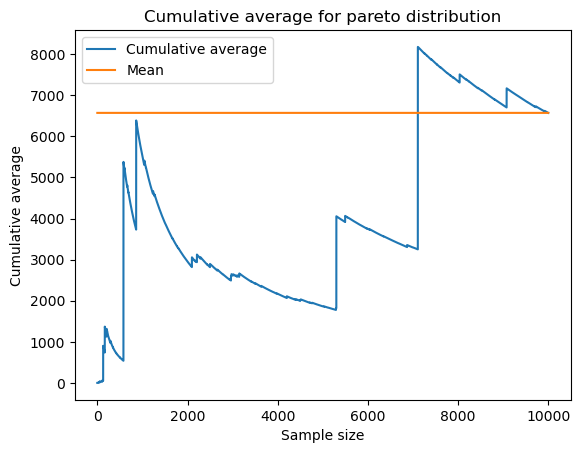

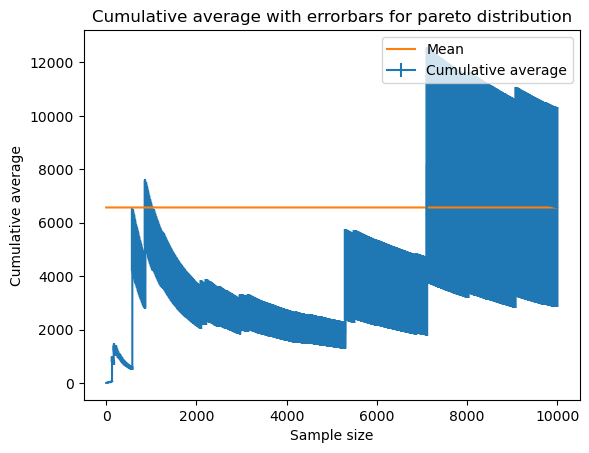

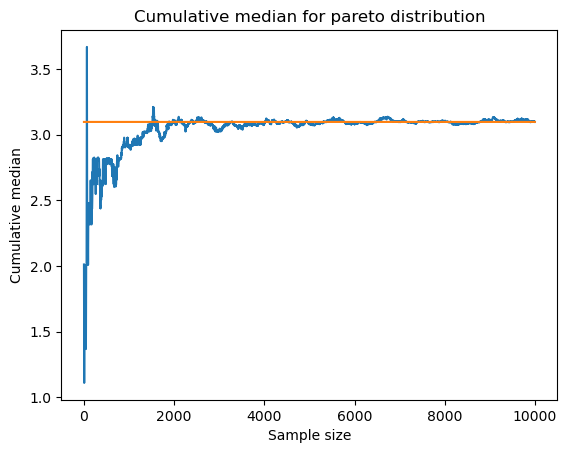

In [25]:
# Plot cumulative average with cumulative errors as errorbars 

size_pareto_samples = range(0, len(data_pareto))

plt.plot(size_pareto_samples, cumulative_av_pareto, label="Cumulative average")
plt.plot(size_pareto_samples, [mean_pareto]*len(size_pareto_samples), label="Mean")
plt.ylabel("Cumulative average")
plt.xlabel("Sample size")
plt.title("Cumulative average for pareto distribution")
plt.legend()
plt.show()


plt.errorbar(size_pareto_samples, cumulative_av_pareto, yerr=cumulative_err_pareto, label="Cumulative average")
plt.plot(size_pareto_samples, [mean_pareto]*len(size_pareto_samples), label="Mean")
plt.ylabel("Cumulative average")
plt.xlabel("Sample size")
plt.title("Cumulative average with errorbars for pareto distribution")
plt.legend()
plt.show()


plt.plot(size_pareto_samples, cumulative_med_pareto)
plt.plot(size_pareto_samples, [median_pareto]*len(size_pareto_samples))
plt.ylabel("Cumulative median")
plt.xlabel("Sample size")
plt.title("Cumulative median for pareto distribution")
plt.show()

In [29]:
papers_og = pd.read_csv("data/papers_dataset.csv")
co_papers = pd.read_csv("data/IC2S2_co_articles.csv")
papers = pd.concat([papers_og, co_papers])

citations = papers["cited_by_count"]

In [37]:
mean_citations = sum(citations) / len(citations)
median_citations = np.median(citations)

sample_papers = papers.sample(n = N)

In [ ]:
# Compute cumulative median, mean and error 

cumulative_av_papers = get_gumulative_av(sample_papers)
cumulative_err_papers = get_gumulative_error(sample_papers)
cumulative_med_papers = get_cumulative_med(sample_papers)

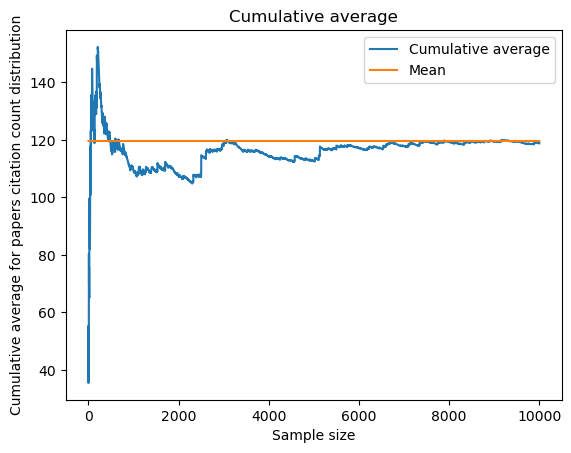

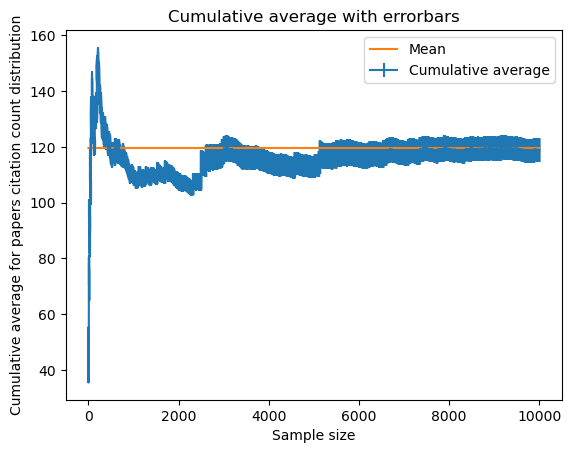

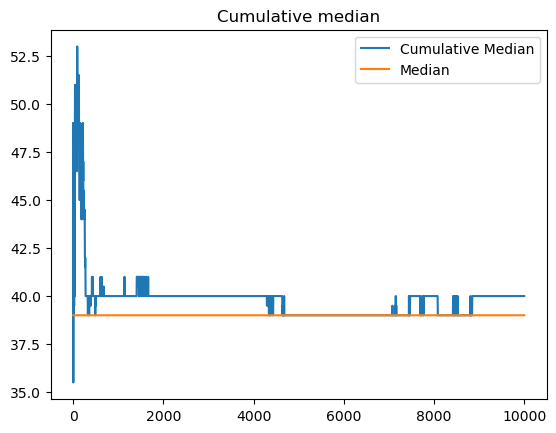

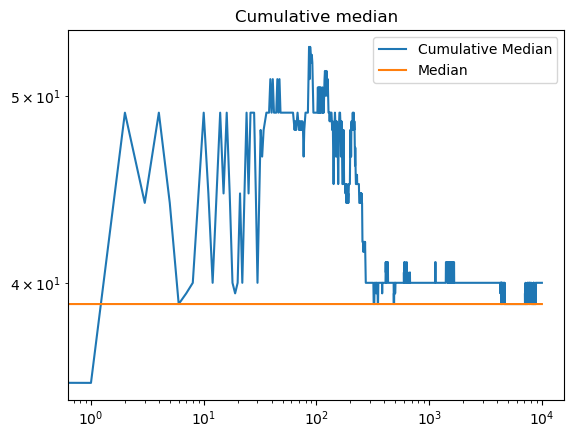

In [ ]:
size_samples_papers = range(0, len(sample_papers))

plt.plot(size_samples_papers, cumulative_av_papers, label="Cumulative average")
plt.plot(size_samples_papers, [mean_citations]*len(size_samples_papers), label="Mean")
plt.ylabel("Cumulative average for papers citation count distribution")
plt.xlabel("Sample size")
plt.title("Cumulative average")
plt.legend()
plt.show()


plt.errorbar(size_samples_papers, cumulative_av_papers, yerr=cumulative_err_papers, label="Cumulative average")
plt.plot(size_samples_papers, [mean_citations]*len(size_samples_papers), label="Mean")
plt.ylabel("Cumulative average for papers citation count distribution")
plt.xlabel("Sample size")
plt.title("Cumulative average with errorbars")
plt.legend()
plt.show()


plt.plot(size_samples_papers, cumulative_med_papers,label="Cumulative Median")
plt.plot(size_samples_papers, [median_citations]*len(size_samples_papers), label="Median")
plt.title("Cumulative median")
plt.legend()
plt.show()


plt.loglog(cumulative_med_papers,label="Cumulative Median")
plt.plot(size_samples_papers, [median_citations]*len(size_samples_papers), label="Median")
plt.title("Cumulative median")
plt.legend()
plt.show()

### Exercise 3

Build a random network.
The probbility that a networks has exactly L links is p(N (N-1))/2 (eq 3.2 in textbook). 

expected_edges = (p*(N*(N-1)))/2 where number of edges in CSS network = 64521   



In [30]:
# Exercise 3

CSS_egdes = 64521   
p = 2*CSS_egdes/(N*(N-1))
print(p)

average_degree = p*(N-1)
print(f"Average degree is: {average_degree}")

0.0012905490549054905
Average degree is: 12.9042


In [31]:
import networkx as nx
from scipy.stats import norm

In [32]:

# Write a func to generate a random network 
def make_random_matrix(N, p):
    A = np.zeros((N,N))
    for i in range(N): 
        for j in range(N):
            if j > i:
                r = np.random.uniform()
                if r < p:
                    A[i][j] = 1
                    A[j][i] = 1
    return A

def generate_random_network(N, p): 
    matrix = make_random_matrix(N, p)
    graph = nx.from_numpy_array(matrix)
    return graph, matrix

G, A = generate_random_network(N, p)

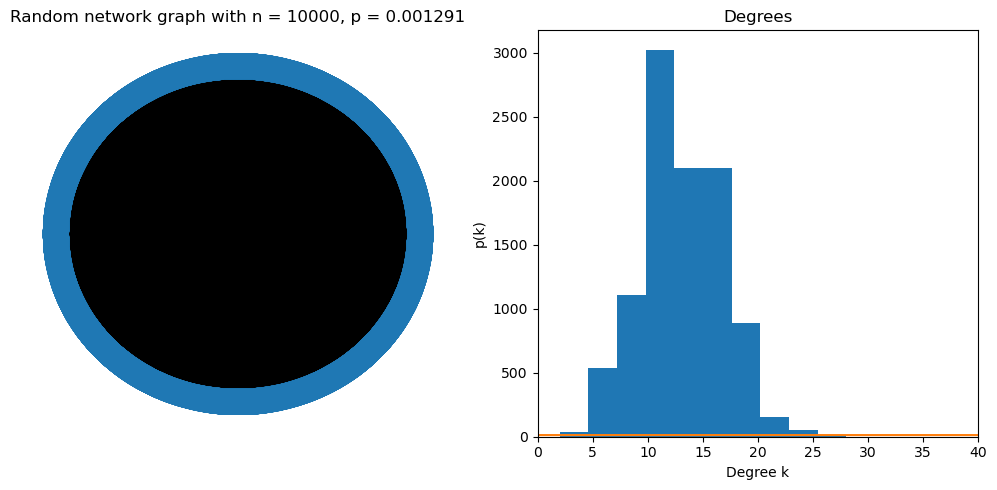

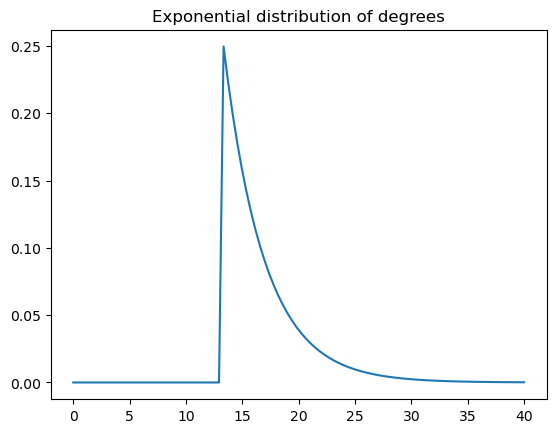

In [33]:
# Visualize graph and degrees of graph 

def plot_graphs(G, A, N, p, lim, average_deg):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].set_title(f"Random network graph with n = {N}, p = {round(p, 6)}")
    nx.draw_circular(G, ax=axs[0])

    degrees = np.sum(A,1) 

    axs[1].hist(degrees)
    axs[1].set_title("Degrees")
    axs[1].set_ylabel("p(k)")
    axs[1].set_xlabel("Degree k")
    axs[1].set_xlim(lim)

    plt.tight_layout()
    limit_range = np.linspace(lim[0], lim[1], N)
    plt.plot(limit_range, ([average_deg]*len(limit_range)))
    plt.show()

    x_values = np.linspace(lim[0], lim[1], 100)
    p_values = expon.pdf(x_values, np.mean(degrees), np.std(degrees))
    plt.plot(x_values, p_values)
    plt.title("Exponential distribution of degrees")
    plt.show()

limits = [0,40]
plot_graphs(G, A, N, p, limits, average_degree)

In [34]:
# visualize(G) 

In [35]:
critical_point = 1/N 
if p < critical_point: 
    print("Below the critical point - subcritical regime")
else: 
    print(f"Above the critical point {critical_point}")
    if p > np.log(N)/N: 
        print("Connected regime")
    else: 
        print("Supercritical regime")



Above the critical point 0.0001
Connected regime


According to the textbook, the network has some gigant components, and belong to the connected regime.

In [43]:
# Make authors graph 
import itertools
from tqdm import tqdm

def count_papers(author_id, authors_ids_list): 
    author1 = author_id[0]
    author2 = author_id[1]
    count = sum(1 for article in authors_ids_list if author1 in article and author2 in article)
    return count 

def create_weighted_edges(papers, graph): 
    w_edge_list = [] 
    authors_ids = papers["author_ids"].to_list()
    # Wrap the loop with tqdm to track progress
    for author_id in tqdm(authors_ids, desc="Processing authors"):
        if len(author_id) == 2 and author_id not in w_edge_list:
            papers_nr = count_papers(author_id, authors_ids) 
            w_edge_list.append((author_id[0], author_id[1], papers_nr))

        if len(author_id) > 2: 
            combinations = list(itertools.combinations(author_id, 2))
            for combination in combinations: 
                if combination not in w_edge_list:
                    papers_nr = count_papers(combination, authors_ids) 
                    w_edge_list.append((combination[0], combination[1], papers_nr))
    return w_edge_list, graph 

graph = nx.Graph()
weighted_edges, graph = create_weighted_edges(sample_papers[:5], graph)
graph.add_weighted_edges_from(weighted_edges)

import pickle

with open('data/CSS_graph.pickle', 'wb') as f:
    pickle.dump(graph, f)

Processing authors:  20%|██        | 1/5 [02:12<08:48, 132.16s/it]


KeyboardInterrupt: 

In [ ]:
visualize(graph)

In [ ]:
# Shortest paths 

# Identify largest connected component 
largest_connected_component = max(list(nx.algorithms.connected_components(G)))

giant_component = nx.Graph.subgraph(G, largest_connected_component) 

shortest_path = nx.average_shortest_path_length(giant_component)
print(shortest_path)

KeyboardInterrupt: 

Redo this with the same number of N, for papers_sample